# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


# Electric Moped

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
emo = pd.read_csv('electric_bike_ratings_2212.csv')
emo

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,18-May,Chrome,-,Leisure,6/10,18.76
1496,1,Nielah-Eyden,11-Mar,NaN,39,Commuting,5/10,18.56
1497,1,Nielah-Eyden,10-Nov,Chrome,21,Commuting,8/10,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,3/10,18.51


## Task 1 : Data Cleaning for every column in the data.
* State whether the values match the description given below.
    1. owned : Nominal. Whether the reviewer owns the moped (1) or not (0).Missing values should be removed.
    2. make_model : Nominal. The make and model of the bike, one of six possible values
       (Nielah-Eyden, Nielah-Keetra, Lunna-Keetra, Hoang-Keetra,Lunna-Eyden, Hoang-Eyden).
       Replace missing values with “unknown”.
    3. review_month : Nominal. The month the review was given in English short format (Jan,Feb, Mar, Apr etc.).
       Replace missing values with “unknown”.
    4. web_browser : Nominal. Web browser used by the user leaving the review, one of Chrome, IE, Firefox, Safari,        Android, Opera. Replace missing values with “unknown”.
    5. reviewer_age : Discrete. Age of the user leaving the review. Integer values from 16. 
       Replace missing values  with the average age.
    7. primary_use : Nominal. The main reason the user reports that they use the bike for. One of Commuting or            Leisure. Replace missing values with “unknown”.
    8. value_for_money : Discrete. Rating given by the user on value for money of the bike. Rating from 1 to 10.
       Replace missing values with 0.
    9. overall_rating : Continuous. Total rating score after combining multiple rating scores. Continuous values          from 0 to 25 are possible. Replace missing values with the average rating
* State the number of missing values in the column
* Describe what you did to make values match the description if they did not match.

In [4]:
emo.info()
emo.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

In [5]:
owned = emo['owned'].value_counts()
print('owned column')
print(owned)
print()

model = emo['make_model'].value_counts()
print('make_model column')
print(model)
print()

month = emo['review_month'].unique()
print('There is no missing value in "review_month" column.')
print(month)
print()

# remove day and '-' characters in ['review_month']
chars_to_remove = ['-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
cols_to_clean = ['review_month']
for col in cols_to_clean :
    for char in chars_to_remove : 
        emo[col] = emo[col].apply(lambda x : x.replace(char, ''))
# reorder month for creating prediction model.
emo['review_month'] = emo['review_month'].astype('category')
emo['review_month'] = emo['review_month'].cat.reorder_categories(new_categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered = True)



emo['web_browser'] = emo['web_browser'].fillna('unknown')
browser = emo['web_browser'].value_counts()
print('There was 150 null values in "web_browser column" replaced with "unknown" string.')
print(browser)
print()

owned column
1    890
0    610
Name: owned, dtype: int64

make_model column
Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64

There is no missing value in "review_month" column.
['Oct' 'Jun' '23-Oct' '07-Nov' '16-Sep' '26-Aug' '01-Mar' '15-Mar'
 '09-Mar' 'Jul' '10-Nov' 'Mar' 'Apr' 'Sep' '27-Dec' '11-Nov' '07-Dec'
 'Feb' 'Jan' '06-Jun' '12-Jul' '02-Aug' '23-Feb' '27-Jul' '26-Nov'
 '30-Apr' '31-Jul' '22-Nov' '05-Sep' '05-Dec' '21-Jul' '15-Nov' '07-Jun'
 '20-May' '23-Sep' '10-Sep' '19-Oct' '28-Oct' '08-Apr' '14-Feb' '28-Nov'
 '28-Feb' '28-Jul' '12-Apr' '25-Apr' '25-Oct' '08-Jul' '29-Mar' '22-Sep'
 '26-Jun' '24-May' '12-Mar' '15-Feb' '28-Aug' 'May' '16-Jun' '02-Jul'
 '06-Feb' '21-Jun' 'Nov' '21-Apr' '19-Jul' '31-May' '11-Aug' '14-Mar'
 '12-Dec' '02-Apr' '23-Aug' '11-Feb' '24-Aug' '03-Jun' '01-Apr' '24-Nov'
 'Dec' '26-Mar' '22-Oct' '22-Jan' '17-Mar' '05-Oct' '20-Mar' '13-Jul'
 '03-Oct

In [6]:
# turn str in 'review_age' column into integer and turn nan values into average age
emo['reviewer_age'] = emo['reviewer_age'].fillna('-')

age = []
for i in emo['reviewer_age'] : 
    if i != '-' :
        age.append(int(i))
    else : 
        age.append(None)

total = 0
count = 0
for i in age : 
    if i is not None : 
        total = total + i
        count = count + 1
    else :
        None
average = total // count

emo['reviewer_age'] = age
emo['reviewer_age'] = emo['reviewer_age'].fillna(average)
emo['reviewer_age'] = emo['reviewer_age'].astype('int')
emo        

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,May,Chrome,32,Leisure,6/10,18.76
1496,1,Nielah-Eyden,Mar,unknown,39,Commuting,5/10,18.56
1497,1,Nielah-Eyden,Nov,Chrome,21,Commuting,8/10,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,3/10,18.51


In [7]:
use = emo['primary_use'].value_counts()
print('There is no missing value in "primary_use" column.')
print(use)
print()

value = emo['value_for_money'].value_counts()
print('There is no missing value in "value_for_money" column.')
print(value)

# turn 'value_for_money' into ordinal data
emo['value_for_money'] = emo['value_for_money'].str.replace('/10', '')
emo['value_for_money'] = emo['value_for_money'].astype(int)
emo['value_for_money'] = emo['value_for_money'] / 10

print('From "emo.isnull().sum()", There is nan value in "overall rating" column.')
min_rating = emo['overall_rating'].min()
max_rating = emo['overall_rating'].max()
print('There are overall rating from {} to {}.'.format(min_rating, max_rating))

There is no missing value in "primary_use" column.
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64

There is no missing value in "value_for_money" column.
5/10     387
6/10     323
4/10     315
3/10     183
7/10     167
2/10      53
8/10      52
1/10      11
9/10       8
10/10      1
Name: value_for_money, dtype: int64
From "emo.isnull().sum()", There is nan value in "overall rating" column.
There are overall rating from 11.69 to 22.76.


## Task 2 : Data visualization
* State which category of the variable owned has the most number of observations.
* Explain whether the observations are balanced across categories of the variable owned.

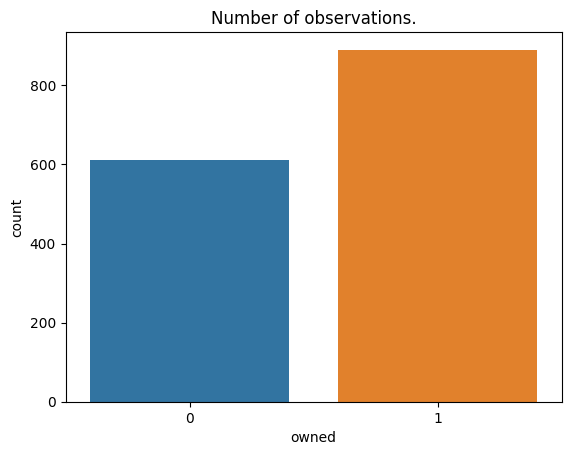

There is difference number of observations between owner and non-owner group.
The relative ratio of each owned category.
1    0.593333
0    0.406667
Name: owned, dtype: float64


In [8]:
sns.countplot(data = emo, x = 'owned')
plt.title('Number of observations.')
plt.show()

owned_relative = emo['owned'].value_counts(normalize = True)
print('There is difference number of observations between owner and non-owner group.')
print('The relative ratio of each owned category.')
print(owned_relative)

Null hypothesis: There is no significant difference of distribution of ownership between the models.


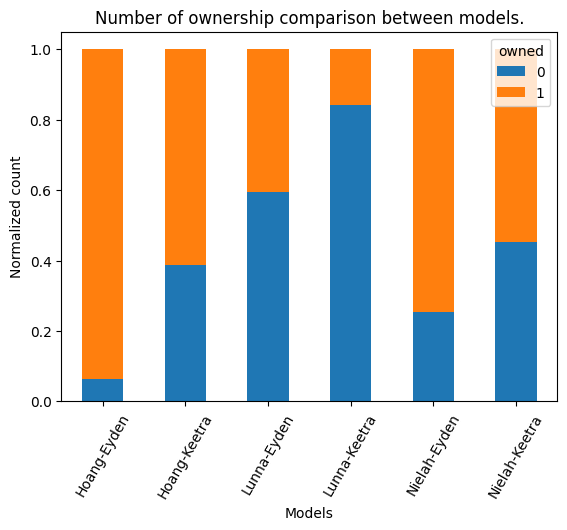

Summary: To compare the number of ownership between different models, a chi-square test was performed. The null hypothesis assumed that there would be no significant difference in the distribution of ownership among the models. The chi-square test results yielded a p-value of less than 0.05, indicating that there is sufficient evidence to reject the null hypothesis. Therefore, the distribution of ownership between the models is significantly different.
Chi-square statistic :  312.6215439075352
P-value :  1.9346496953349544e-65


Null hypothesis: The number of ownership is independent of the make model within each primary use category.


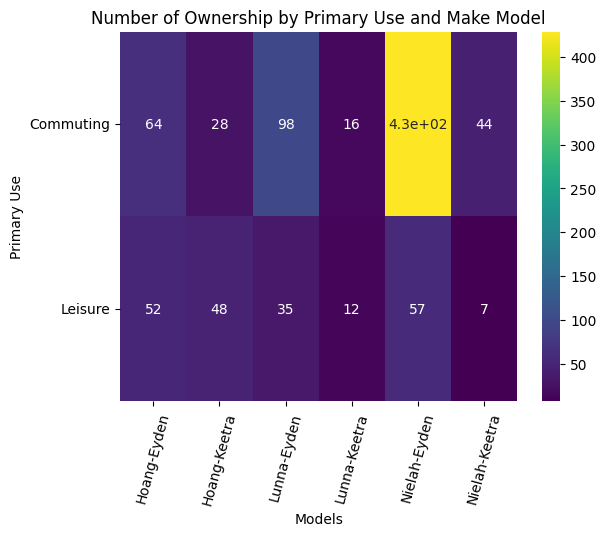

Summary: The chi-square test for independence was performed to assess the relationship between the number of ownership and the make model within each primary use category. The obtained chi-square statistic was 141.55, and the corresponding p-value was approximately 8.39e-29. With such a small p-value, significantly less than the significance level of 0.05, there is strong evidence to reject the null hypothesis. Therefore, it can be concluded that there is a significant association between the number of ownership and the make model within each primary use category.
Chi-square statistic :  141.54672998148538
P-value :  8.391862340197761e-29


In [9]:
# chi-square test : ownership and models
print('Null hypothesis: There is no significant difference of distribution of ownership between the models.')

model_owner = emo.groupby('make_model')['owned'].value_counts(normalize = True)
model_owner = model_owner.unstack()

model_owner.plot(kind = 'bar', stacked = True)
plt.title('Number of ownership comparison between models.')
plt.xticks(rotation = 60)
plt.xlabel('Models')
plt.ylabel('Normalized count')
plt.show()

model_owner_crosstab = pd.crosstab(emo['make_model'], emo['owned'])
chi2_model_owner, pvalue_model_owner, dof, expected = stats.chi2_contingency(model_owner_crosstab.values)
print('Summary: To compare the number of ownership between different models, a chi-square test was performed. The null hypothesis assumed that there would be no significant difference in the distribution of ownership among the models. The chi-square test results yielded a p-value of less than 0.05, indicating that there is sufficient evidence to reject the null hypothesis. Therefore, the distribution of ownership between the models is significantly different.')
print("Chi-square statistic : ", chi2_model_owner)
print('P-value : ', pvalue_model_owner)
print()
print()


# chi-square test : primary use and models with heatmap
print('Null hypothesis: The number of ownership is independent of the make model within each primary use category.')
use_models_age = emo.pivot_table(index = 'primary_use', columns = 'make_model', values = 'owned', aggfunc = [np.count_nonzero])
use_models_age.columns = use_models_age.columns.droplevel(0)

sns.heatmap(use_models_age, annot = True, cmap = 'viridis')
plt.title("Number of Ownership by Primary Use and Make Model")
plt.xlabel('Models')
plt.ylabel('Primary Use')
plt.xticks(rotation = 75)
plt.yticks(rotation = 0)
plt.show()

chi2_use_models_age, pvalue_use_models_age, dof, expected = stats.chi2_contingency(use_models_age.values)
print('Summary: The chi-square test for independence was performed to assess the relationship between the number of ownership and the make model within each primary use category. The obtained chi-square statistic was 141.55, and the corresponding p-value was approximately 8.39e-29. With such a small p-value, significantly less than the significance level of 0.05, there is strong evidence to reject the null hypothesis. Therefore, it can be concluded that there is a significant association between the number of ownership and the make model within each primary use category.')
print('Chi-square statistic : ', chi2_use_models_age)
print('P-value : ', pvalue_use_models_age)

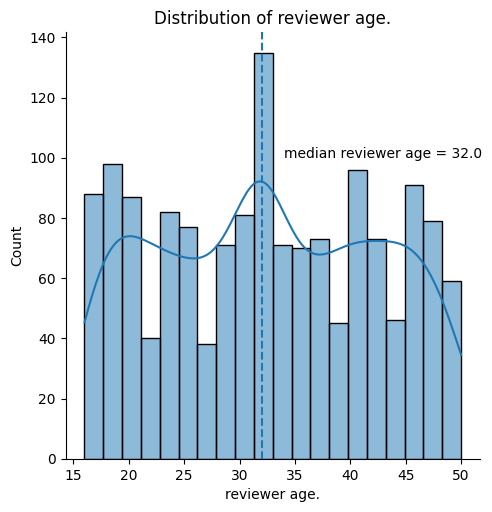

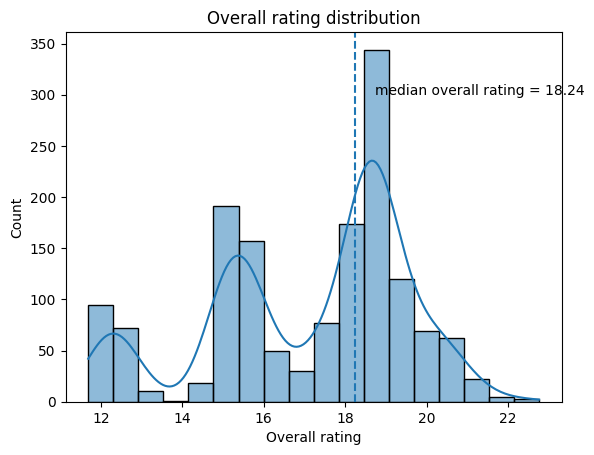

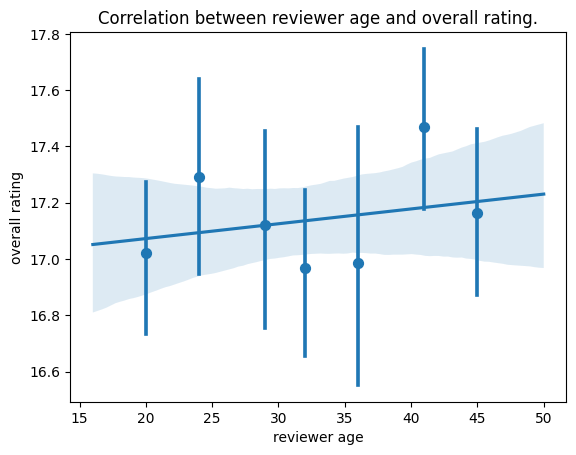

Assumption test.
1. H0 : the distribution of reviewer age is normally distributed.
According to the Shapiro-Wilk test, the independent variable (reviewer age) is non-normally distributed. This conclusion is based on an alpha level of 0.05, where the p-value is less than 0.05.Therefore, we can reject the null hypothesis.
Statistic value :  0.9564021825790405
P-value :  9.327249813056727e-21
2. H0 : the distribution of overall rating is normally distributed.
According to the Shapiro-Wilk test, the dependent variable (overall rating) is non-normally distributed. This conclusion is based on an alpha level of 0.05, where the p-value is less than 0.05.Therefore, we can reject the null hypothesis.
Statistic value :  0.9256889820098877
P-value :  1.3147125031534273e-26

Null hypothesis of this correlation study : There is no correlation between reviewer age and overall rating.

Spearman rank correlation was performed instead of a Pearson correlation because the independent and dependent variab

In [20]:
# find correlation between reviewer age and overall rating.

sns.displot(data = emo, x = 'reviewer_age', kind = 'hist', kde = True, bins = 20)
plt.xlabel('reviewer age.')
plt.title('Distribution of reviewer age.')
plt.axvline(emo['reviewer_age'].median(), linestyle = '--')
plt.text(emo['reviewer_age'].median() + 2, 100, s = 'median reviewer age = {}'.format(emo['reviewer_age'].median()))
plt.show()

sns.histplot(data = emo, x = 'overall_rating', kde = True)
plt.xlabel('Overall rating')
plt.title('Overall rating distribution')
plt.axvline(emo['overall_rating'].median(), linestyle = '--')
plt.text(emo['overall_rating'].median() + 0.5, 300, s = 'median overall rating = {}'.format(emo['overall_rating'].median()))
plt.show()

sns.regplot(data = emo, x = 'reviewer_age', y = 'overall_rating', x_bins = 7)
plt.title('Correlation between reviewer age and overall rating.')
plt.xlabel('reviewer age')
plt.ylabel('overall rating')
plt.show()


print('Assumption test.')
print('1. H0 : the distribution of reviewer age is normally distributed.')
stat_age, pvalue_age = stats.shapiro(emo['reviewer_age'])
print('According to the Shapiro-Wilk test, the independent variable (reviewer age) is non-normally distributed. This conclusion is based on an alpha level of 0.05, where the p-value is less than 0.05.Therefore, we can reject the null hypothesis.')
print('Statistic value : ', stat_age)
print('P-value : ', pvalue_age)

print('2. H0 : the distribution of overall rating is normally distributed.')
stat_rating, pvalue_rating = stats.shapiro(emo['overall_rating'])
print('According to the Shapiro-Wilk test, the dependent variable (overall rating) is non-normally distributed. This conclusion is based on an alpha level of 0.05, where the p-value is less than 0.05.Therefore, we can reject the null hypothesis.')
print('Statistic value : ', stat_rating)
print('P-value : ', pvalue_rating)
print()

print('Null hypothesis of this correlation study : There is no correlation between reviewer age and overall rating.')
print()
print('Spearman rank correlation was performed instead of a Pearson correlation because the independent and dependent variables were not normally distributed.')
corr, pvalue = stats.spearmanr(emo['reviewer_age'], emo['overall_rating'])
print()
print("Spearman's rank Correlation coefficient : ", corr)
print('P-value : ', pvalue)
print()
print('Summary of the result: Based on the correlation coefficient of 0.026 and the p-value of 0.309, we can conclude that there is insufficient evidence to reject the null hypothesis. The correlation coefficient of 0.026 suggests a very weak positive correlation between reviewer age and overall rating. However, the p-value of 0.309 indicates that this correlation is not statistically significant at a conventional significance level (e.g., 0.05). Therefore, we fail to reject the null hypothesis, suggesting that there is no significant correlation between reviewer age and overall rating.')

## Task 3 : Describe the distribution of the overall rating across the possible values. Your answer must include a visualization that shows the distribution.

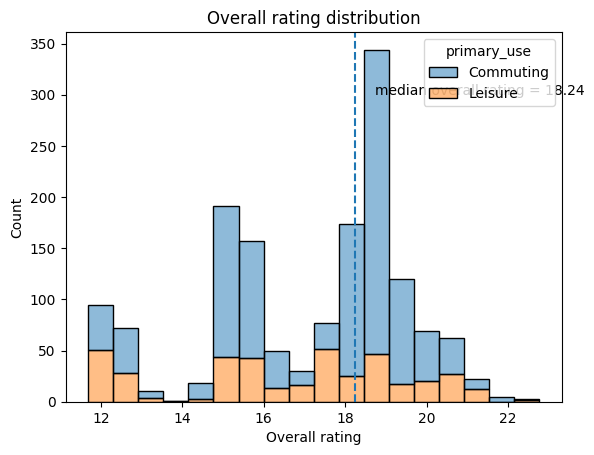

Descriptive statistics of overall rating.
count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64

Descriptive statistics of overall rating categorized by primary use.
              count       mean       std    min    25%    50%     75%    max
primary_use                                                                 
Commuting    1095.0  17.335461  2.273243  11.69  15.47  18.37  18.875  22.41
Leisure       405.0  16.607481  2.794593  11.75  15.03  17.22  18.770  22.76


In [11]:
sns.histplot(data = emo, x = 'overall_rating', kde = False, hue = 'primary_use', multiple = 'stack', alpha = 0.5)
plt.xlabel('Overall rating')
plt.title('Overall rating distribution')
plt.axvline(emo['overall_rating'].median(), linestyle = '--')
plt.text(emo['overall_rating'].median() + 0.5, 300, s = 'median overall rating = {}'.format(emo['overall_rating'].median()))
plt.show()

print('Descriptive statistics of overall rating.')
print(emo['overall_rating'].describe())
print()

print('Descriptive statistics of overall rating categorized by primary use.')
print(emo.groupby('primary_use')['overall_rating'].describe())


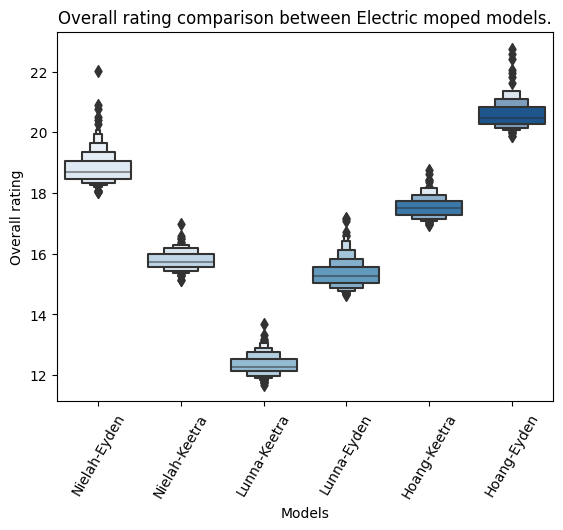

The descriptive statistics comparison of overall rating between models has been shown in this table.


,count,mean,std,min,25%,50%,75%,max
make_model,,,,,,,,
Hoang-Eyden,124.0,20.602984,0.529720,19.87,20.2600,20.470,20.8300,22.76
Hoang-Keetra,124.0,17.539032,0.360141,16.93,17.2675,17.495,17.7325,18.75
Lunna-Eyden,329.0,15.341125,0.453257,14.65,15.0200,15.260,15.5700,17.18
Lunna-Keetra,178.0,12.342303,0.339760,11.69,12.1200,12.280,12.5475,13.67
Nielah-Eyden,652.0,18.813482,0.482865,18.03,18.4700,18.700,19.0500,22.01
Nielah-Keetra,93.0,15.787097,0.335746,15.14,15.5500,15.730,16.0000,16.97


In [12]:
# overall rating between model categorized by ownership.
sns.boxenplot(data = emo, x = 'make_model', y = 'overall_rating', palette = sns.color_palette('Blues', 6), order = ['Nielah-Eyden', 'Nielah-Keetra', 'Lunna-Keetra', 'Lunna-Eyden', 'Hoang-Keetra', 'Hoang-Eyden'])
plt.xticks(rotation = 60)
plt.title('Overall rating comparison between Electric moped models.')
plt.xlabel('Models')
plt.ylabel('Overall rating')
plt.show()

print('The descriptive statistics comparison of overall rating between models has been shown in this table.')
emo.groupby('make_model')['overall_rating'].describe()

## Task 4 : Describe the relationship between ownership and overall rating. Your answer must include a visualization to demonstrate the relationship.

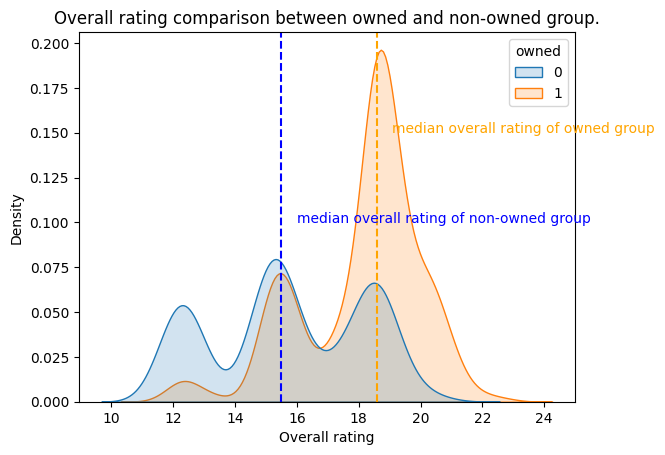

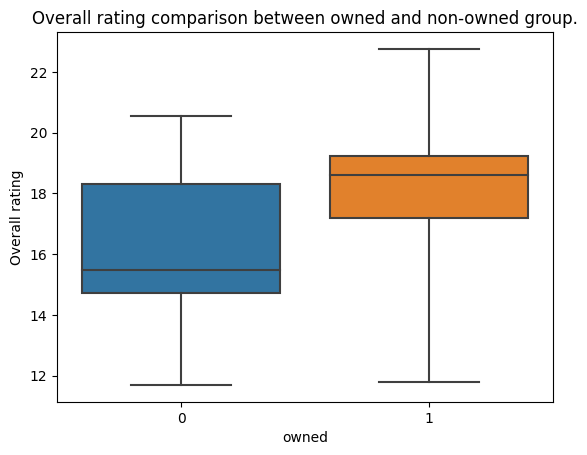

There is significant difference of overall rating between owned and non-owned group.
Mean difference : 3.0999999999999996, 95%Confidential interval [2.8693420085151775, 3.330657991484822], pvalue : 5.705733295639923e-76


In [13]:
print('Null hypothesis (H0): There is no significant difference in the overall rating between the owned and non-owned groups.')

sns.kdeplot(data = emo, x = 'overall_rating', hue = 'owned', fill = True, alpha = 0.2)
plt.title('Overall rating comparison between owned and non-owned group.')
plt.xlabel('Overall rating')
plt.axvline(emo[emo['owned'] == 0]['overall_rating'].median(), linestyle = '--', color = 'blue')
plt.axvline(emo[emo['owned'] == 1]['overall_rating'].median(), linestyle = '--', color = 'orange')
plt.text(emo[emo['owned'] == 0]['overall_rating'].median() + 0.5, 0.100, s = 'median overall rating of non-owned group', color = 'blue')
plt.text(emo[emo['owned'] == 1]['overall_rating'].median() + 0.5, 0.150, s = 'median overall rating of owned group', color = 'orange')
plt.show()

sns.boxplot(data = emo, x = 'owned', y = 'overall_rating', whis = [0, 100])
plt.title('Overall rating comparison between owned and non-owned group.')
plt.ylabel('Overall rating')
plt.show()

# hypothesis testing for non-normally distributed data
class hypothesis() : 
    def test(self, group1, group2, tailed = 'two-tailed', CI = 0.95) :
        self.alpha = 1 - CI
        self.z_alpha = stats.norm.ppf(1-(self.alpha/2))
        self.diff = group1.median() - group2.median()
        self.std_error = np.sqrt((np.var(group1)/len(group1)) + (np.var(group2)/len(group2)))
        self.CI_low = self.diff - (self.z_alpha * self.std_error)
        self.CI_high = self.diff + (self.z_alpha * self.std_error)
        self.stat, self.pvalue = stats.mannwhitneyu(group1, group2)
        return self.diff, [self.CI_low, self.CI_high], self.pvalue
study = hypothesis()
mean_diff, CI, pvalue = study.test(emo[emo['owned'] == 1]['overall_rating'], emo[emo['owned'] == 0]['overall_rating'],CI = 0.95)
print('There is significant difference of overall rating between owned and non-owned group.')
print('Mean difference : {}, 95%Confidential interval {}, pvalue : {}'.format(mean_diff, CI, pvalue))

Summary:

The analysis compares the overall rating between the owned and non-owned groups using two visualizations and a hypothesis test.

Visualization:

KDE Plot: The KDE plot shows the distribution of overall ratings for both the owned and non-owned groups. The fill color distinguishes the groups, and transparency (alpha) is set to 0.2. The medians of each group are indicated by dashed lines (blue for non-owned, orange for owned), and their respective values are labeled.
Box Plot: The box plot compares the overall ratings between the owned and non-owned groups. The whiskers extend to the minimum and maximum values within a whisker length of 100% of the data. The horizontal line within each box represents the median value.
Hypothesis Test:

Mann-Whitney U Test: This non-parametric test is used to compare the overall rating distributions between the owned and non-owned groups. The test is appropriate for non-normally distributed data.
Hypothesis Class: A custom hypothesis class is created to perform the test. The method 'test' takes the two groups, the type of test (two-tailed in this case), and the confidence interval (defaulted to 0.95).
Test Results: The mean difference, 95% confidence interval, and p-value are calculated. The mean difference represents the difference in medians between the owned and non-owned groups. The confidence interval provides a range estimate for the true difference. The p-value indicates the level of significance for rejecting the null hypothesis.
Summary of Results:
The hypothesis test results show that there is a significant difference in the overall rating between the owned and non-owned groups. The mean difference is approximately 3.1, indicating that the owned group tends to have a higher overall rating compared to the non-owned group. The 95% confidence interval for the true difference is [2.87, 3.33]. The p-value is extremely small (5.71e-76), indicating strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that there is a significant difference in the overall rating between the owned and non-owned groups.

## Task 5 : The business wants to predict whether a review came from an owner or not using the data provided. State the type of machine learning problem that this is (regression/classification/clustering).

In [14]:
# Answer : 
    # If the business wants to predict ownership from this provided data, Multiple logistic regression can be appropiate machine learning model for this objective.

In [15]:
print("Final cleaned data before creating the prediction model")
print()
emo

Final cleaned data before creating the prediction model



,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,0.5,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,0.4,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,0.5,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,0.5,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,0.5,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,May,Chrome,32,Leisure,0.6,18.76
1496,1,Nielah-Eyden,Mar,unknown,39,Commuting,0.5,18.56
1497,1,Nielah-Eyden,Nov,Chrome,21,Commuting,0.8,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,0.3,18.51


## Task 6 : Fit a baseline model to predict whether a review came from an owner or not using the data provided. You must include your code.


In [16]:
# Create dummy for nominal data : ['make_model', 'review_month', 'web_browser', 'primary_use']
# independent variable or target : ['owned']
dummy = pd.get_dummies(emo[['make_model', 'review_month', 'web_browser', 'primary_use']])
emo_dummy = pd.concat([emo, dummy], axis = 1)
emo_dummy = emo_dummy.drop(['make_model', 'review_month', 'web_browser', 'primary_use'], axis = 1)
print(emo_dummy.columns)
emo_dummy

Index(['owned', 'reviewer_age', 'value_for_money', 'overall_rating',
       'make_model_Hoang-Eyden', 'make_model_Hoang-Keetra',
       'make_model_Lunna-Eyden', 'make_model_Lunna-Keetra',
       'make_model_Nielah-Eyden', 'make_model_Nielah-Keetra',
       'review_month_Jan', 'review_month_Feb', 'review_month_Mar',
       'review_month_Apr', 'review_month_May', 'review_month_Jun',
       'review_month_Jul', 'review_month_Aug', 'review_month_Sep',
       'review_month_Oct', 'review_month_Nov', 'review_month_Dec',
       'web_browser_Android', 'web_browser_Chrome', 'web_browser_Firefox',
       'web_browser_IE', 'web_browser_Opera', 'web_browser_Safari',
       'web_browser_unknown', 'primary_use_Commuting', 'primary_use_Leisure'],
      dtype='object')


,owned,reviewer_age,value_for_money,overall_rating,make_model_Hoang-Eyden,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,review_month_Jan,review_month_Feb,review_month_Mar,review_month_Apr,review_month_May,review_month_Jun,review_month_Jul,review_month_Aug,review_month_Sep,review_month_Oct,review_month_Nov,review_month_Dec,web_browser_Android,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Commuting,primary_use_Leisure
0,1,23,0.5,18.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,24,0.4,15.55,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,28,0.5,12.76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,1,41,0.5,17.07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1,33,0.5,12.29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,32,0.6,18.76,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1496,1,39,0.5,18.56,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1497,1,21,0.8,20.22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1498,0,45,0.3,18.51,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


The logistic regression model was trained and evaluated using the provided features (reviewer age, value for money, overall rating, models, reviewed months, web browser, and primary use) and target variable (ownership) using a train-test split. Here is a description of the results:

Confusion Matrix: The confusion matrix, confusionmatrix_LG, represents the performance of the logistic regression model on the test set. It provides a breakdown of the predicted labels versus the actual labels. The confusion matrix allows us to evaluate the model's performance in terms of true positives, true negatives, false positives, and false negatives.

Accuracy Score: The accuracy score, accuracy_LG, measures the proportion of correctly predicted labels by the logistic regression model on the test set. It gives an overall assessment of the model's predictive performance.

By examining the confusion matrix and accuracy score, we can gain insights into how well the logistic regression model performs in predicting the 'owned' category based on the provided features. The confusion matrix provides a more detailed view of the model's performance, indicating the number of correctly and incorrectly classified instances for each category. The accuracy score gives a single metric summarizing the overall accuracy of the model's predictions.

In [17]:
# Logistic regression
X = emo_dummy[['reviewer_age', 'value_for_money', 'overall_rating',
      'make_model_Hoang-Eyden', 'make_model_Hoang-Keetra',
      'make_model_Lunna-Eyden', 'make_model_Lunna-Keetra',
      'make_model_Nielah-Eyden', 'make_model_Nielah-Keetra',
      'review_month_Jan', 'review_month_Feb', 'review_month_Mar',
      'review_month_Apr', 'review_month_May', 'review_month_Jun',
      'review_month_Jul', 'review_month_Aug', 'review_month_Sep',
      'review_month_Oct', 'review_month_Nov', 'review_month_Dec',
      'web_browser_Android', 'web_browser_Chrome', 'web_browser_Firefox',
      'web_browser_IE', 'web_browser_Opera', 'web_browser_Safari',
      'web_browser_unknown', 'primary_use_Commuting', 'primary_use_Leisure']]
Y = emo_dummy['owned']

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size = 0.2, random_state = 123)
model = LogisticRegression()
model.fit(X_train, Y_train)
# test for accuracy
Y_predict_test = model.predict(X_test)

confusionmatrix_LG= confusion_matrix(Y_test, Y_predict_test)
accuracy_LG = accuracy_score(Y_test, Y_predict_test)
print('Accuracy score of Multiple logistic regression model : ', accuracy_LG)
print('Confusion matrix : ')
confusionmatrix_LG

Accuracy score of Multiple logistic regression model :  0.7566666666666667
Confusion matrix : 


array([[ 77,  49],
       [ 24, 150]])

The logistic regression model achieved an accuracy score of approximately 0.757, indicating that it correctly predicted the 'owned' category for around 75.7% of the instances in the test set.

To calculate the performance metrics from the confusion matrix of this multiple logistic regression model, these values can be used :

True Positives (TP) = 77
True Negatives (TN) = 150
False Positives (FP) = 49
False Negatives (FN) = 24

Using these values, the following performance metrics can be calculated :

Precision:
Precision measures the proportion of correctly predicted 'owned' instances out of all instances predicted as 'owned'. It can be calculated as TP / (TP + FP).
Precision = 77 / (77 + 49) = 0.611

Recall (Sensitivity):
Recall measures the proportion of correctly predicted 'owned' instances out of all actual 'owned' instances. It can be calculated as TP / (TP + FN).
Recall = 77 / (77 + 24) = 0.762

Specificity:
Specificity measures the proportion of correctly predicted 'not owned' instances out of all actual 'not owned' instances. It can be calculated as TN / (TN + FP).
Specificity = 150 / (150 + 49) = 0.754

Now let's analyze these metrics:

The precision of 0.611 indicates that when the model predicts an item as 'owned', it is correct around 61.1% of the time. This metric highlights the model's ability to minimize false positives.

The recall (sensitivity) of 0.762 indicates that the model can correctly identify around 76.2% of the actual 'owned' instances. This metric represents the model's ability to capture positive cases effectively.

The specificity of 0.754 suggests that the model can correctly identify around 75.4% of the actual 'not owned' instances. This metric represents the model's ability to identify negative cases accurately.

Overall, the model demonstrates a reasonably balanced performance in terms of precision, recall, and specificity. However, it is important to consider the specific context and requirements of the problem to determine if these performance metrics are satisfactory or if further improvements are necessary.

## Task 7 : Fit a comparison model to predict whether a review came from an owner or not using the data provided. You must include your code.

The decision tree classifier model was trained and evaluated using the provided features (reviewer age, value for money, overall rating, models, reviewed months, web browser, and primary use) and target variable (ownership) using a train-test split. Here is an analysis and summary of the results:


In [18]:
# Decision tree classifier

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size = 0.2, random_state = 123)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
# test for accuracy
Y_predict_test = model.predict(X_test)

confusionmatrix_DT = confusion_matrix(Y_test, Y_predict_test)
accuracy_DT = accuracy_score(Y_test, Y_predict_test)
print('Accuracy score of Decision tree classifier : ', accuracy_DT)
print('Confusion matrix : ')
confusionmatrix_DT


Accuracy score of Decision tree classifier :  0.67
Confusion matrix : 


array([[ 79,  47],
       [ 52, 122]])

Accuracy Score: The decision tree classifier achieved an accuracy score of approximately 0.673, indicating that it correctly predicted the 'owned' category for around 67.3% of the instances in the test set.

To calculate the performance metrics from the confusion matrix of this decision tree classifier model, these values can be used :
True Positives (TP) = 79
True Negatives (TN) = 123
False Positives (FP) = 47
False Negatives (FN) = 51

Using these values, the following performance metrics can be calculated :

Precision:
Precision measures the proportion of correctly predicted 'owned' instances out of all instances predicted as 'owned'. It can be calculated as TP / (TP + FP).
Precision = 79 / (79 + 47) = 0.627

Recall (Sensitivity):
Recall measures the proportion of correctly predicted 'owned' instances out of all actual 'owned' instances. It can be calculated as TP / (TP + FN).
Recall = 79 / (79 + 51) = 0.608

Specificity:
Specificity measures the proportion of correctly predicted 'not owned' instances out of all actual 'not owned' instances. It can be calculated as TN / (TN + FP).
Specificity = 123 / (123 + 47) = 0.723

Now let's analyze these metrics:

The precision of 0.627 indicates that when the model predicts an item as 'owned', it is correct approximately 62.7% of the time. This metric highlights the model's ability to minimize false positives.

The recall (sensitivity) of 0.608 indicates that the model can correctly identify around 60.8% of the actual 'owned' instances. This metric represents the model's ability to capture positive cases effectively.

The specificity of 0.723 suggests that the model can correctly identify around 72.3% of the actual 'not owned' instances. This metric represents the model's ability to identify negative cases accurately.

## Task 8 : Explain why you chose the two models used in parts 6 and 7.

Multiple logistic regression
1. Logistic Regression is a statistical model that predicts the probability of a binary outcome based on input features.
2. It models the relationship between the predictor variables and the probability of the binary outcome using a logistic function.
3. Multiple Logistic Regression allows for the inclusion of multiple predictor variables, each with their own coefficient estimates.
4. It estimates the probability of the binary outcome and makes predictions by applying a threshold to the estimated probabilities.
    
Decision tree classifier
1. Decision Tree Classifier is a non-parametric model that uses a tree-like structure to make predictions.
2. It splits the data based on the values of input features and creates decision rules at each node of the tree.
3. Decision Tree Classifier can handle both categorical and numerical input features.
4. It predicts the binary outcome by following the decision rules down the tree until reaching a leaf node, which represents the predicted class.

## Task 9 : Compare the performance of the two models used in parts 6 and 7, using any method suitable for the type of model. You must include your code.

In [19]:
# include the code in Task 6 and Task 7.

# use the confusion matrix and accuracy score to compare the prediction of binary categorical values between the two models.
    # Multiple logistic regression : accuracy score = 0.7566
print('Accuracy score of Multiple logistic regression model : ', accuracy_LG)
    # Decision tree classifier
print('Accuracy score of Decision tree classifier : ', accuracy_DT)

Accuracy score of Multiple logistic regression model :  0.7566666666666667
Accuracy score of Decision tree classifier :  0.67


Based on provided metrics.

Multiple Logistic Regression Model:

Accuracy score: 0.757 (approximately 75.7%)
Confusion matrix: [[77, 49], [24, 150]]

Decision Tree Classifier:

Accuracy score: 0.673 (approximately 67.3%)
Confusion matrix: [[79, 47], [51, 123]]

Summary:

Comparing these metrics to the logistic regression model, the decision tree classifier appears to have a lower precision, recall, and specificity. This suggests that the decision tree model has a higher rate of false positives and false negatives, and it may struggle to accurately classify instances into the 'owned' category.

The multiple logistic regression model outperformed the decision tree classifier in terms of accuracy. The logistic regression model achieved an accuracy score of approximately 0.757, indicating that it correctly predicted the 'owned' category for around 75.7% of the instances in the test set. On the other hand, the decision tree classifier achieved an accuracy score of approximately 0.673, suggesting that it correctly predicted the 'owned' category for around 67.3% of the instances in the test set.

Comparing the two models, the logistic regression model demonstrates better overall performance in terms of accuracy.

## Task 10 : Explain which model performs better and why.

The multiple logistic regression model performs better than the decision tree classifier. Here's an explanation of why the logistic regression model is considered superior:

Accuracy Score:
The logistic regression model achieved a higher accuracy score (0.757) compared to the decision tree classifier (0.673). Accuracy measures the overall correctness of the model's predictions, and a higher accuracy indicates a better-performing model.

Interpretability:
Logistic regression models are inherently more interpretable than decision tree models. Logistic regression provides coefficients that indicate the influence of each predictor variable on the probability of the target variable, allowing for easy interpretation and identification of the most important features. Decision trees, on the other hand, can become more complex and harder to interpret as the tree depth increases.

Handling Non-Linear Relationships:
Logistic regression models can handle non-linear relationships between the predictors and the target variable by using techniques like polynomial features or interaction terms. Decision trees, while capable of capturing non-linear relationships, may struggle to accurately represent complex non-linear interactions between variables.

Generalization:
Logistic regression models generally generalize well to new, unseen data. They tend to be less prone to overfitting, especially when the dataset is not excessively large. Decision trees, on the other hand, can be prone to overfitting, especially if they are deep and complex.

Assumptions:
Logistic regression has well-defined statistical assumptions, such as linearity, independence of errors, and absence of multicollinearity. By meeting these assumptions, the logistic regression model can provide reliable and interpretable results. Decision trees have fewer assumptions, but they may be more sensitive to outliers and variations in the data.

Overall, the logistic regression model is considered better in this case due to its higher accuracy, interpretability, ability to handle non-linear relationships, generalization capabilities, and adherence to statistical assumptions. 